In [1]:
import numpy as np
from tqdm.notebook import tqdm
import requests

from energy import energy_gradient, energy_function_forward, gradient_magnitude_sobel_operator
from seams import seams_map_dp, seam_map_function_forward, carve_column_mask
from seam_carve import SeamCarve, get_importance_map_from_borders

from PIL import Image
from matplotlib import pyplot as plt
import os

In [2]:
url = 'https://static.boredpanda.com/blog/wp-content/uploads/2016/03/hairy-fluffy-cat-sky-the-ragdoll-31.jpg'
img = Image.open(requests.get(url, stream=True).raw)

if not os.path.exists('images'):
    os.mkdir('images')
    
img.save(os.path.join('images/cat.jpg'))

In [3]:
img_path = 'images/cat.jpg'

print('Original size:', np.array(img).shape)

new_size = (650, 710)
print('New size:', new_size)

Original size: (700, 700, 3)
New size: (650, 710)


In [4]:
upper = 0.04
bottom = 1
left = 0.23
right = 0.78

importance_map = get_importance_map_from_borders(img, upper, bottom, left, right)
importance_map_img = Image.fromarray(np.uint8(importance_map), 'L')

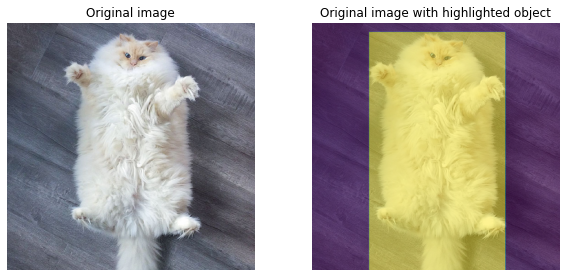

In [5]:
plt.figure(figsize=(10,10))

plt.subplot(221)
plt.imshow(img)
plt.axis(False)
plt.title('Original image')

plt.subplot(222)
plt.imshow(img)
plt.axis(False)
plt.imshow(importance_map_img, alpha=.5)
plt.axis(False)
plt.title('Original image with highlighted object')

plt.show()

## Energy gradient

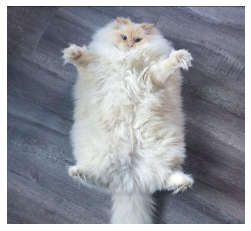

In [6]:
sc_dual_grad = SeamCarve(image_path=img_path,
                new_size=new_size,
                energy_function=energy_gradient,
                seam_map_function=seams_map_dp,
                carve_function=carve_column_mask,
                importance_map = None,
                name_suffix='dual_grad')

sc_dual_grad.run()

sc_dual_grad.save_result()

plt.imshow(sc_dual_grad.final_image)
plt.axis(False)
plt.show()

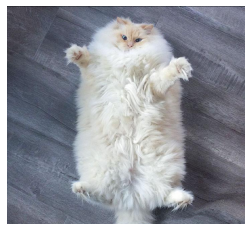

In [7]:
sc_dual_grad = SeamCarve(image_path=img_path,
                new_size=new_size,
                energy_function=energy_gradient,
                seam_map_function=seams_map_dp,
                carve_function=carve_column_mask,
                importance_map = importance_map,
                name_suffix='dual_grad_with_object')

sc_dual_grad.run()

sc_dual_grad.save_result()

plt.imshow(sc_dual_grad.final_image)
plt.axis(False)
plt.show()

In [8]:
# sc_dual_grad.__dict__

In [9]:
np.sum(sc_dual_grad.time_by_step)

102.81537300000019

## Sobel

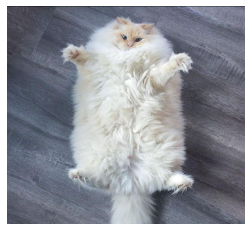

In [10]:
sc_sobel = SeamCarve(image_path=img_path,
                new_size=new_size,
                energy_function=gradient_magnitude_sobel_operator,
                seam_map_function=seams_map_dp,
                carve_function=carve_column_mask,
                importance_map = None,
                name_suffix='sobel')

sc_sobel.run()

sc_sobel.save_result()

plt.imshow(sc_sobel.final_image)
plt.axis(False)
plt.show()

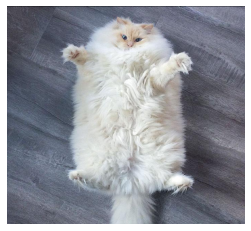

In [11]:
sc_sobel = SeamCarve(image_path=img_path,
                new_size=new_size,
                energy_function=gradient_magnitude_sobel_operator,
                seam_map_function=seams_map_dp,
                carve_function=carve_column_mask,
                importance_map = importance_map,
                name_suffix='sobel_with_object')

sc_sobel.run()

sc_sobel.save_result()

plt.imshow(sc_sobel.final_image)
plt.axis(False)
plt.show()

## Forward energy

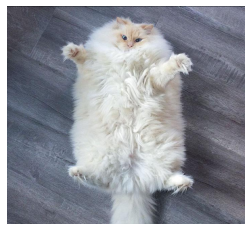

In [12]:
sc_forward = SeamCarve(image_path=img_path,
                new_size=new_size,
                energy_function=energy_function_forward,
                seam_map_function=seam_map_function_forward,
                carve_function=carve_column_mask,
                importance_map = None,
                name_suffix='forward')

sc_forward.run()

sc_forward.save_result()

plt.imshow(sc_forward.final_image)
plt.axis(False)
plt.show()

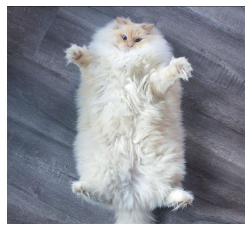

In [13]:
sc_forward = SeamCarve(image_path=img_path,
                new_size=new_size,
                energy_function=energy_function_forward,
                seam_map_function=seam_map_function_forward,
                carve_function=carve_column_mask,
                importance_map = importance_map,
                name_suffix='forward_with_object')

sc_forward.run()

sc_forward.save_result()

plt.imshow(sc_forward.final_image)
plt.axis(False)
plt.show()

## Object removal

In [2]:
from skimage import data, draw

In [3]:
img_path = 'images/aircraft.jpg'
img = np.asarray(Image.open(img_path))
img.shape

(300, 300, 3)

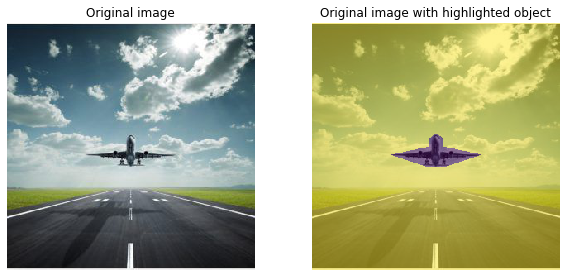

In [4]:
masked_img = img.copy()
poly = [(175, 140), (175, 160), (160, 205), (150, 158), (140, 158), (134, 150),
        (140, 142), (150, 142), (160, 95)]

pr = np.array([p[0] for p in poly])
pc = np.array([p[1] for p in poly])
rr, cc = draw.polygon(pr, pc)

masked_img[rr, cc, :] = masked_img[rr, cc, :] * 0.5 + np.array([1, 1, 0]) * .5

importance_map = np.zeros(img.shape[:2])
importance_map[rr, cc] = -1

plt.figure(figsize=(10,10))

plt.subplot(221)
plt.imshow(img)
plt.axis(False)
plt.title('Original image')

plt.subplot(222)
plt.imshow(img)
plt.axis(False)
plt.imshow(importance_map, alpha=.5)
plt.axis(False)
plt.title('Original image with highlighted object')

plt.show()

In [5]:
importance_map_height = np.max(pr) - np.min(pr)
importance_map_width = np.max(pc) - np.min(pc)

In [6]:
energy = energy_gradient # energy_function_forward, gradient_magnitude_sobel_operator
seams_map = seams_map_dp # seams_map_dp, seam_map_function_forward
carve = carve_column_mask

new_size = (300 - importance_map_height, 300)

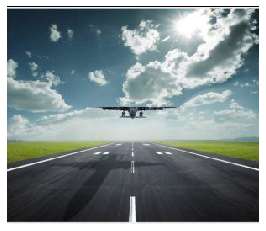

In [7]:
sc = SeamCarve(image_path=img_path,
                new_size=new_size,
                energy_function=energy,
                seam_map_function=seams_map,
                carve_function=carve,
                importance_map = importance_map,
                name_suffix='dual_grad')

sc.run()

sc.save_result()

plt.imshow(sc.final_image)
plt.axis(False)
plt.show()

In [9]:
# sc.show_gif()